In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset import train_loader, test_loader
from model import Net_s9, dropout_value
from utils import train, test, train_losses, test_losses, train_acc, test_acc
from wrong_classified import get_incorrect_preds, plot_incorrect_preds

/home/sn/anaconda3/envs/fastai2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████| 170498071/170498071 [00:16<00:00, 10134028.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified
cuda available? True


In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_s9().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]             480
           Conv2d-10           [-1, 16, 32, 32]             784
depthwise_separable_conv-11           [-1, 16, 32, 32]               0
             ReLU-12           [-1, 16, 32, 32]               0
      BatchNorm2d-13           [-1, 16, 32, 32]              32
          Dropout-14       

In [4]:
EPOCHS = 30
lrs=[]
model =  Net_s9().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.04, epochs=EPOCHS, steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.5801030397415161 Batch_id=195 Accuracy=32.60: 100%|█| 196/196 [00:14<00:0



Test set: Average loss: 1.5437, Accuracy: 4398/10000 (43.98%)

EPOCH: 2


Loss=1.6835410594940186 Batch_id=195 Accuracy=45.16: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 1.3569, Accuracy: 5090/10000 (50.90%)

EPOCH: 3


Loss=1.3461062908172607 Batch_id=195 Accuracy=50.81: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 1.2200, Accuracy: 5661/10000 (56.61%)

EPOCH: 4


Loss=1.1562211513519287 Batch_id=195 Accuracy=54.84: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 1.1132, Accuracy: 6032/10000 (60.32%)

EPOCH: 5


Loss=1.1788736581802368 Batch_id=195 Accuracy=58.90: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.9747, Accuracy: 6558/10000 (65.58%)

EPOCH: 6


Loss=1.0773693323135376 Batch_id=195 Accuracy=62.09: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.8823, Accuracy: 6867/10000 (68.67%)

EPOCH: 7


Loss=1.0331605672836304 Batch_id=195 Accuracy=64.17: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.8235, Accuracy: 7089/10000 (70.89%)

EPOCH: 8


Loss=1.0068283081054688 Batch_id=195 Accuracy=66.12: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.8452, Accuracy: 7107/10000 (71.07%)

EPOCH: 9


Loss=0.9712154269218445 Batch_id=195 Accuracy=67.87: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.7757, Accuracy: 7327/10000 (73.27%)

EPOCH: 10


Loss=1.0915331840515137 Batch_id=195 Accuracy=69.99: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.7327, Accuracy: 7472/10000 (74.72%)

EPOCH: 11


Loss=0.9235784411430359 Batch_id=195 Accuracy=70.72: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.6560, Accuracy: 7756/10000 (77.56%)

EPOCH: 12


Loss=0.8544237017631531 Batch_id=195 Accuracy=71.78: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.6234, Accuracy: 7825/10000 (78.25%)

EPOCH: 13


Loss=0.8333080410957336 Batch_id=195 Accuracy=73.00: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.6228, Accuracy: 7859/10000 (78.59%)

EPOCH: 14


Loss=0.8264471888542175 Batch_id=195 Accuracy=73.87: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.6246, Accuracy: 7853/10000 (78.53%)

EPOCH: 15


Loss=0.8527668714523315 Batch_id=195 Accuracy=74.44: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.5524, Accuracy: 8125/10000 (81.25%)

EPOCH: 16


Loss=0.63103848695755 Batch_id=195 Accuracy=75.19: 100%|█| 196/196 [00:13<00:00,



Test set: Average loss: 0.5653, Accuracy: 8026/10000 (80.26%)

EPOCH: 17


Loss=0.5967286825180054 Batch_id=195 Accuracy=75.89: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.5377, Accuracy: 8135/10000 (81.35%)

EPOCH: 18


Loss=0.6081699728965759 Batch_id=195 Accuracy=76.57: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.5238, Accuracy: 8199/10000 (81.99%)

EPOCH: 19


Loss=0.480307012796402 Batch_id=195 Accuracy=77.09: 100%|█| 196/196 [00:13<00:00



Test set: Average loss: 0.5156, Accuracy: 8250/10000 (82.50%)

EPOCH: 20


Loss=0.950287938117981 Batch_id=195 Accuracy=77.34: 100%|█| 196/196 [00:13<00:00



Test set: Average loss: 0.4911, Accuracy: 8303/10000 (83.03%)

EPOCH: 21


Loss=0.7310655117034912 Batch_id=195 Accuracy=78.17: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4790, Accuracy: 8376/10000 (83.76%)

EPOCH: 22


Loss=0.7143535017967224 Batch_id=195 Accuracy=78.62: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4578, Accuracy: 8463/10000 (84.63%)

EPOCH: 23


Loss=0.3925246596336365 Batch_id=195 Accuracy=79.32: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4631, Accuracy: 8450/10000 (84.50%)

EPOCH: 24


Loss=0.5792862176895142 Batch_id=195 Accuracy=79.92: 100%|█| 196/196 [00:14<00:0



Test set: Average loss: 0.4493, Accuracy: 8444/10000 (84.44%)

EPOCH: 25


Loss=0.3756812810897827 Batch_id=195 Accuracy=80.59: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4326, Accuracy: 8536/10000 (85.36%)

EPOCH: 26


Loss=0.7502709627151489 Batch_id=195 Accuracy=81.24: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4177, Accuracy: 8567/10000 (85.67%)

EPOCH: 27


Loss=0.49313610792160034 Batch_id=195 Accuracy=81.65: 100%|█| 196/196 [00:13<00:



Test set: Average loss: 0.4114, Accuracy: 8589/10000 (85.89%)

EPOCH: 28


Loss=0.4726453423500061 Batch_id=195 Accuracy=82.20: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.4066, Accuracy: 8608/10000 (86.08%)

EPOCH: 29


Loss=0.43917781114578247 Batch_id=195 Accuracy=82.58: 100%|█| 196/196 [00:13<00:



Test set: Average loss: 0.4023, Accuracy: 8625/10000 (86.25%)

EPOCH: 30


Loss=0.4990159869194031 Batch_id=195 Accuracy=82.72: 100%|█| 196/196 [00:13<00:0



Test set: Average loss: 0.3997, Accuracy: 8646/10000 (86.46%)



Text(0.5, 1.0, 'Test Accuracy')

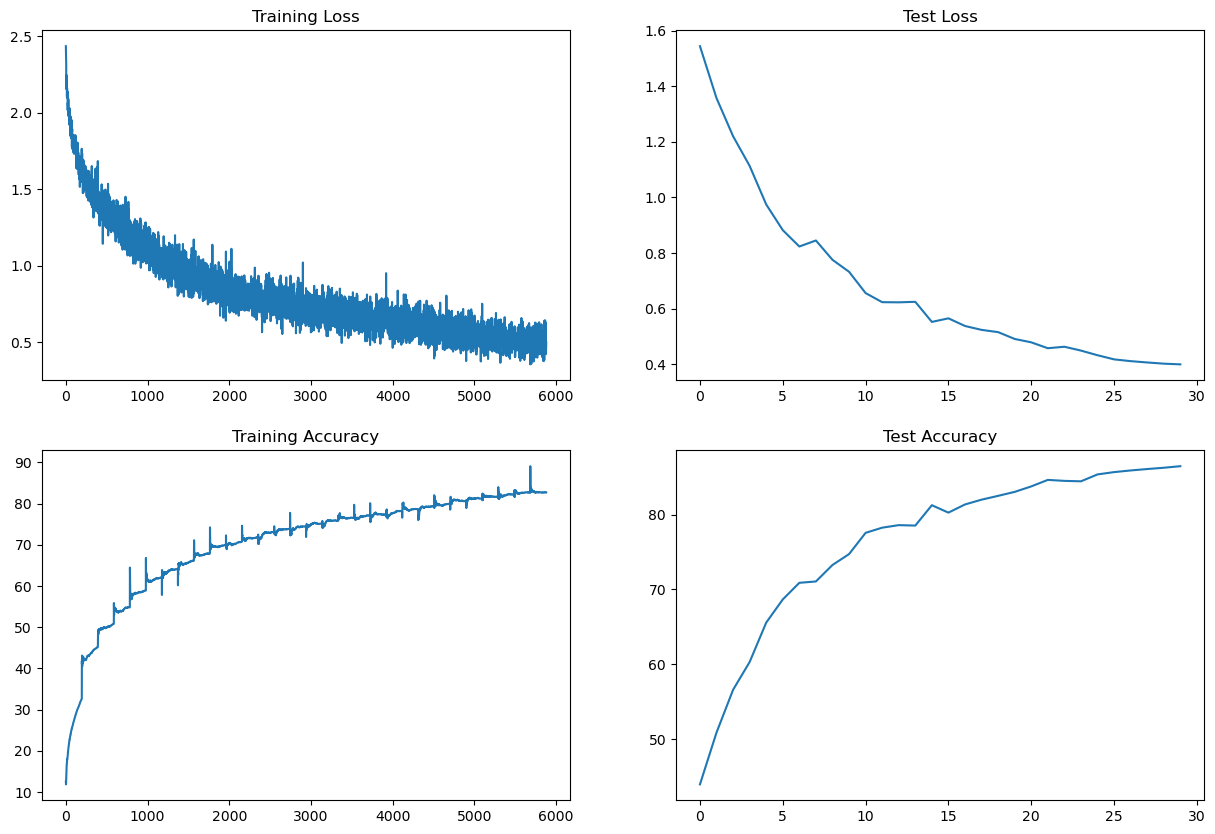

In [5]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Classes in order Actual and Predicted


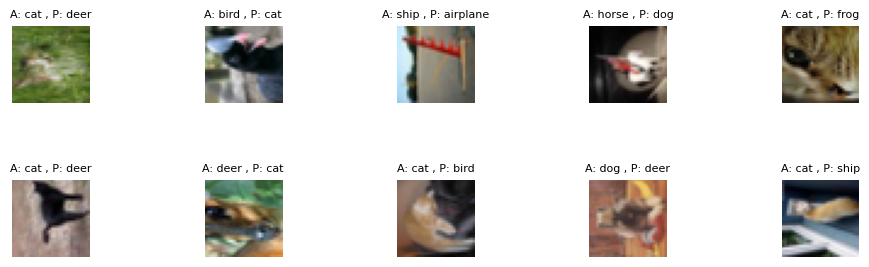

In [6]:
true_wrong, incorrect_examples, pred_wrong = get_incorrect_preds(model, test_loader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)